In [69]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# Load the dataset
automobile_df = pd.read_table('automobile.txt', delimiter=',')

automobile_df.head()



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [71]:
#cleaning the dataset

#drop columns
automobile_df.drop(columns=['symboling','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system','compression-ratio'],inplace=True)
automobile_df.head()


,normalized-losses,make,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,13495
1,?,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,16500
2,?,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,5000,19,26,16500
3,164,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,5500,24,30,13950
4,164,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,5500,18,22,17450


In [72]:
automobile_df = automobile_df[automobile_df != '?']
automobile_df = automobile_df.dropna()
automobile_df.head()

x = automobile_df.dtypes
print(x)
            

normalized-losses     object
make                  object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [73]:
#convert colums with objct datatypes to int/float datatypes
automobile_df['normalized-losses'] = automobile_df['normalized-losses'].astype(np.int64)
automobile_df['price'] = automobile_df['price'].astype(np.int64)
automobile_df['horsepower'] = automobile_df['horsepower'].astype(np.int64)
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].astype(np.int64)
automobile_df['stroke'] = automobile_df['stroke'].astype(float)
automobile_df['bore'] = automobile_df['bore'].astype(float)

x = automobile_df.dtypes
print(x)

normalized-losses      int64
make                  object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [74]:
#calculate the mean score for each make so we can begin to compare values
df_mean = automobile_df.groupby('make').mean()

df_mean
          


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,
audi,161.000000,102.700000,184.650000,68.850000,55.050000,2772.750000,128.000000,3.175000,3.400000,116.750000,5500.000000,19.500000,24.250000,18246.250000
bmw,190.000000,101.200000,176.800000,64.800000,54.300000,2566.250000,136.000000,3.405000,2.995000,111.000000,5025.000000,22.000000,28.500000,18857.500000
chevrolet,100.000000,92.466667,151.933333,62.500000,52.400000,1757.000000,80.333333,2.990000,3.083333,62.666667,5300.000000,41.000000,46.333333,6007.000000
dodge,133.444444,95.011111,160.988889,64.166667,51.644444,2151.333333,102.666667,3.094444,3.365556,86.333333,5388.888889,28.000000,34.111111,7875.444444
honda,103.000000,94.330769,160.769231,64.384615,53.238462,2096.769231,99.307692,3.021538,3.462308,80.230769,5753.846154,30.384615,35.461538,8184.692308
jaguar,145.000000,113.000000,199.600000,69.600000,52.800000,4066.000000,258.000000,3.630000,4.170000,176.000000,4750.000000,15.000000,19.000000,32250.000000
mazda,114.454545,96.763636,170.445455,65.418182,54.436364,2206.818182,109.545455,3.264545,3.260000,80.000000,4909.090909,27.545455,33.636364,9080.000000
mercedes-benz,102.800000,107.780000,190.440000,70.620000,55.440000,3643.000000,193.200000,3.556000,3.532000,129.400000,4430.000000,20.800000,23.600000,29726.400000
mitsubishi,146.200000,95.190000,166.480000,64.940000,50.840000,2228.500000,107.000000,3.150000,3.384000,91.800000,5350.000000,26.700000,33.300000,7813.000000


In [75]:
#reduce the number of decimal places to make the data easier to read 
df_mean = df_mean.round(decimals = 2)

df_mean




,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,
audi,161.00,102.70,184.65,68.85,55.05,2772.75,128.00,3.18,3.40,116.75,5500.00,19.50,24.25,18246.25
bmw,190.00,101.20,176.80,64.80,54.30,2566.25,136.00,3.40,3.00,111.00,5025.00,22.00,28.50,18857.50
chevrolet,100.00,92.47,151.93,62.50,52.40,1757.00,80.33,2.99,3.08,62.67,5300.00,41.00,46.33,6007.00
dodge,133.44,95.01,160.99,64.17,51.64,2151.33,102.67,3.09,3.37,86.33,5388.89,28.00,34.11,7875.44
honda,103.00,94.33,160.77,64.38,53.24,2096.77,99.31,3.02,3.46,80.23,5753.85,30.38,35.46,8184.69
jaguar,145.00,113.00,199.60,69.60,52.80,4066.00,258.00,3.63,4.17,176.00,4750.00,15.00,19.00,32250.00
mazda,114.45,96.76,170.45,65.42,54.44,2206.82,109.55,3.26,3.26,80.00,4909.09,27.55,33.64,9080.00
mercedes-benz,102.80,107.78,190.44,70.62,55.44,3643.00,193.20,3.56,3.53,129.40,4430.00,20.80,23.60,29726.40
mitsubishi,146.20,95.19,166.48,64.94,50.84,2228.50,107.00,3.15,3.38,91.80,5350.00,26.70,33.30,7813.00


<AxesSubplot:xlabel='make'>

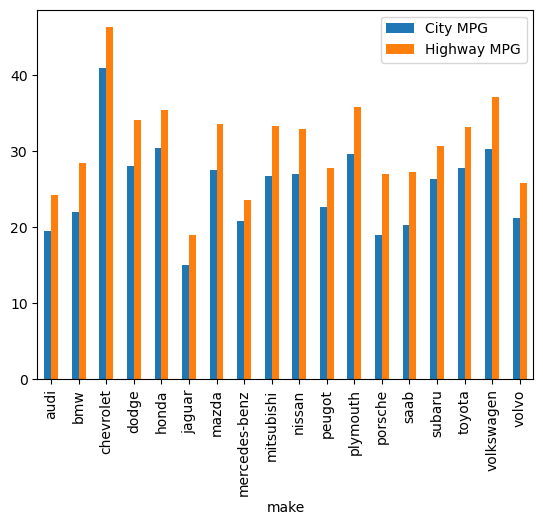

In [76]:
#compare which make has the best miles per gallon
    
# DataFrame with the relevant columns to plot  
columns_of_interest = pd.DataFrame({'City MPG': df_mean['city-mpg'],
                                     'Highway MPG': df_mean['highway-mpg'],
                                   }
                                   )

columns_of_interest.plot(kind='bar')


C:\Users\sarad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


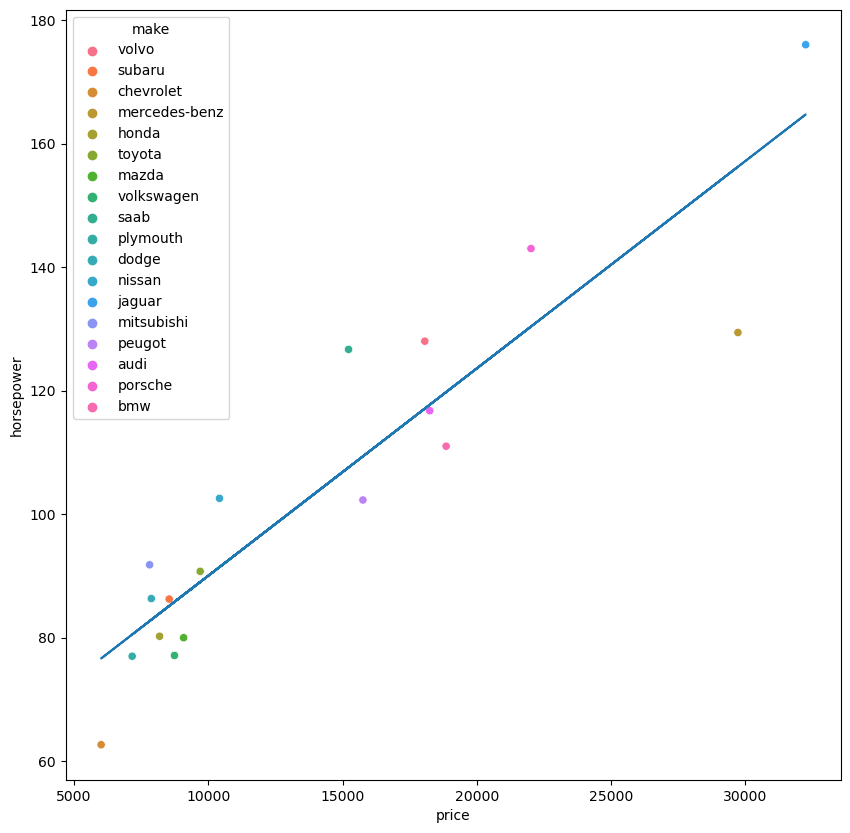

In [89]:
#does a more expensive car mean more horsepower? - tells hus which car is the mst expensive and which has the highest horsepower

c = df_mean.index

x = df_mean['price']
y = df_mean['horsepower']

a, b = np.polyfit(x, y, 1)

plt.figure(figsize=(10,10))
sns.scatterplot(x,y,hue=c )
plt.plot(x, a*x+b)


C:\Users\sarad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='normalized-losses', ylabel='make'>

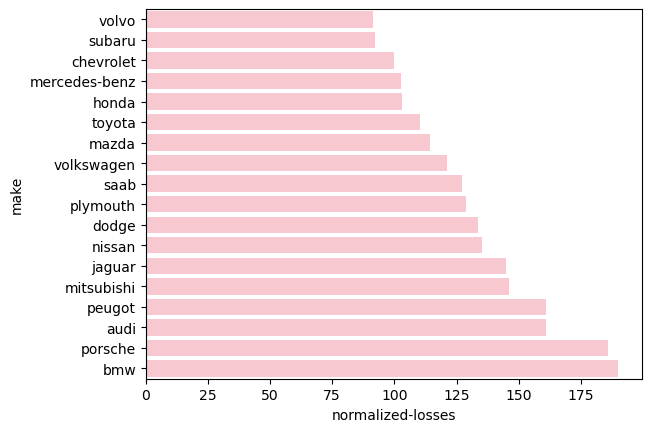

In [78]:
# normalized losses - insurance cost to fix the car vs the actual value of the car
# lower normalized losses are better so we plot the graph in ascending order to make it easier to read

df_mean = df_mean.sort_values('normalized-losses')
x = df_mean['normalized-losses']
y = df_mean.index

sns.barplot(x,y,color = 'pink')

C:\Users\sarad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


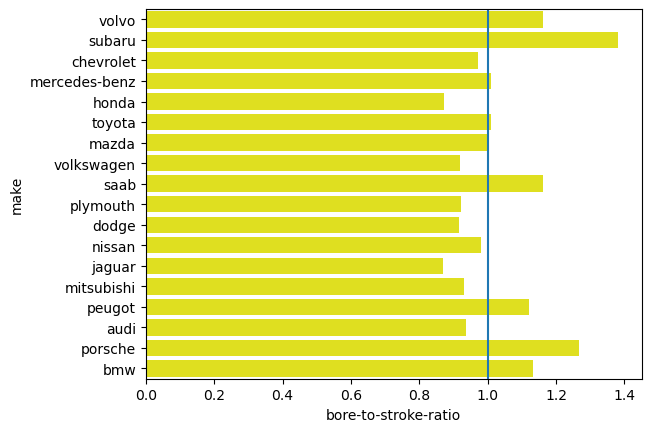

In [87]:
#bore to stroke ratio - type of car
# 1 = equal speed and agility
# >1 = agility - larger car
# <1 = high speed

df_mean['bore-to-stroke-ratio'] = df_mean['bore']/df_mean['stroke']

x = df_mean['bore-to-stroke-ratio']
y = df_mean.index



graph = sns.barplot(x,y,color='yellow')
graph.axvline(1)


